# ImageClassifier_CNN (Himnish A)

## Setup and Load Data

### Installing requirements

In [1]:
!pip install tensorflow  opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
gpu = tf.config.experimental.list_physical_devices('GPU')
print(gpu)
for gpus in gpu:
  tf.config.experimental.set_memory_growth(gpus, True)


[]


In [4]:
!git clone https://github.com/ThunderE75/CNN-ImageClassification.git

Cloning into 'CNN-ImageClassification'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 319 (delta 1), reused 6 (delta 1), pack-reused 313 (from 1)
Receiving objects: 100% (319/319), 108.08 MiB | 27.74 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (309/309), done.


In [5]:
data_dir = '/content/CNN-ImageClassification/data'


In [6]:
import os
import cv2
import imghdr

data_dir = '/content/CNN-ImageClassification/data'

# Supported image extensions
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

# Iterate over the classes (folders) and images
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)

    # Check if it's a directory
    if os.path.isdir(class_dir):
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                # Read image and check extension
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)

                # Check if the file has a valid image extension
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)  # Uncomment if you want to delete corrupted files


### Loading data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch

(array([[[[170.        , 171.        , 166.        ],
          [170.1289    , 171.1289    , 166.1289    ],
          [171.21484   , 172.21484   , 167.21484   ],
          ...,
          [167.21484   , 172.21484   , 166.21484   ],
          [166.1289    , 171.1289    , 165.1289    ],
          [165.04297   , 170.04297   , 164.04297   ]],
 
         [[170.        , 171.        , 166.        ],
          [170.1289    , 171.1289    , 166.1289    ],
          [171.21484   , 172.21484   , 167.21484   ],
          ...,
          [167.77539   , 172.77539   , 166.77539   ],
          [166.68945   , 171.68945   , 165.68945   ],
          [165.60352   , 170.60352   , 164.60352   ]],
 
         [[170.        , 171.        , 166.        ],
          [170.1289    , 171.1289    , 166.1289    ],
          [171.21484   , 172.21484   , 167.21484   ],
          ...,
          [168.21484   , 173.21484   , 167.21484   ],
          [167.1289    , 172.1289    , 166.1289    ],
          [166.29904   , 171.29

In [12]:
batch[1]
# 0's are happy
# 1's are happy

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

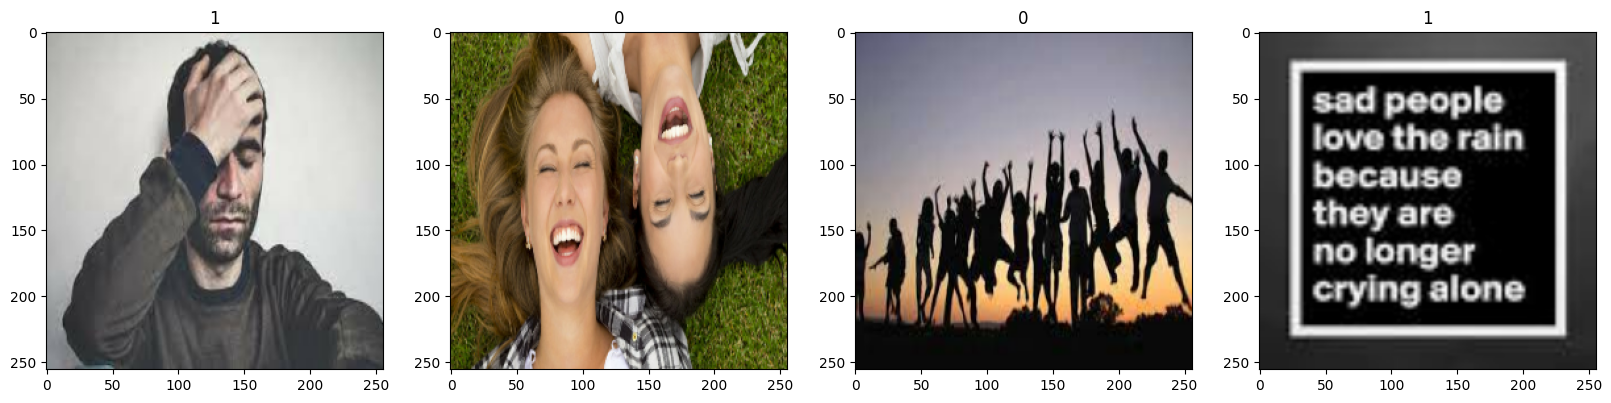

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing data

### Scaling data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

In [17]:
batch[0].max()

1.0

In [18]:
# Splitting data
len(data)

10

In [22]:
train_size = int(len(data)*.7)
valid_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
valid_size

2

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(valid_size)
test = data.skip(train_size+valid_size).take(test_size)

## Deep Model

### Building the deep model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D (16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D (32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D (16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Training model

In [33]:
logdir = '/content/logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5109 - loss: 0.8204 - val_accuracy: 0.5000 - val_loss: 0.6702
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.5823 - loss: 0.6721 - val_accuracy: 0.6094 - val_loss: 0.6389
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6196 - loss: 0.6390 - val_accuracy: 0.7656 - val_loss: 0.5673
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7545 - loss: 0.5987 - val_accuracy: 0.6406 - val_loss: 0.6507
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6167 - loss: 0.7255 - val_accuracy: 0.9375 - val_loss: 0.5550
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8429 - loss: 0.5711 - val_accuracy: 0.7656 - val_loss: 0.5401
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7405 - loss: 0.5374 - val_accuracy: 0.8125 - val_loss: 0.4156
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8262 - loss: 0.4049 - val_accuracy: 0.7969 - val_loss: 0.3303
Epoch 9/

### Plotting the performance

In [37]:
hist.history

{'accuracy': [0.5267857313156128,
  0.6517857313156128,
  0.6785714030265808,
  0.6964285969734192,
  0.6517857313156128,
  0.8258928656578064,
  0.7410714030265808,
  0.84375,
  0.8839285969734192,
  0.90625,
  0.9196428656578064,
  0.9732142686843872,
  0.96875,
  0.9776785969734192,
  0.9910714030265808,
  0.9866071343421936,
  0.9598214030265808,
  0.9553571343421936,
  0.9955357313156128,
  0.9821428656578064],
 'loss': [0.7632773518562317,
  0.6667116284370422,
  0.6167982220649719,
  0.6598061919212341,
  0.6529332995414734,
  0.5704777836799622,
  0.5150477886199951,
  0.38401415944099426,
  0.31823018193244934,
  0.26661548018455505,
  0.21454687416553497,
  0.14122486114501953,
  0.11613810807466507,
  0.08449791371822357,
  0.04794362559914589,
  0.05267989635467529,
  0.12377901375293732,
  0.11507328599691391,
  0.0739133208990097,
  0.051984336227178574],
 'val_accuracy': [0.5,
  0.609375,
  0.765625,
  0.640625,
  0.9375,
  0.765625,
  0.8125,
  0.796875,
  0.8125,
  0.9

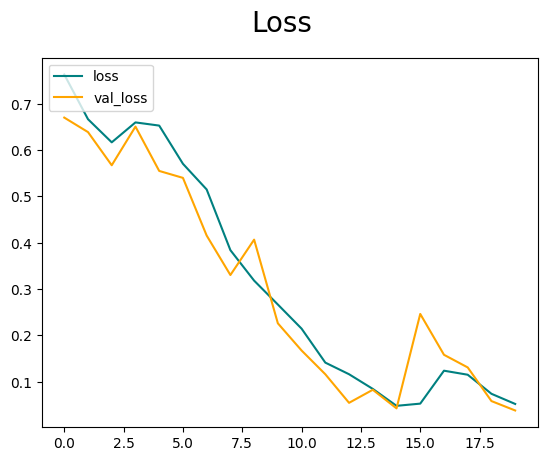

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

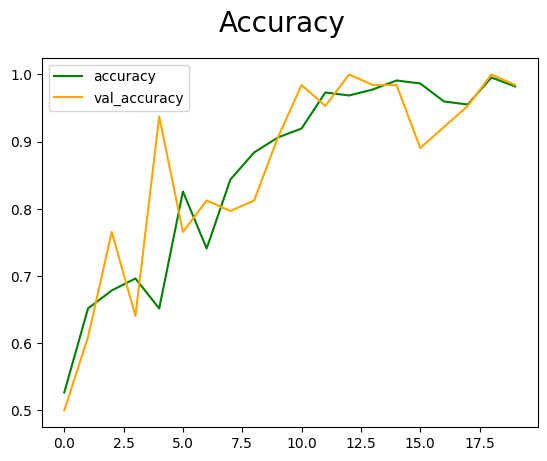

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluating the performance

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


In [46]:
print(f'Precision: {pre.result().numpy()}\n Recall: {re.result().numpy()}\n Accuracy: {acc.result().numpy()}')

Precision: 1.0
 Recall: 1.0
 Accuracy: 1.0


### Testing

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

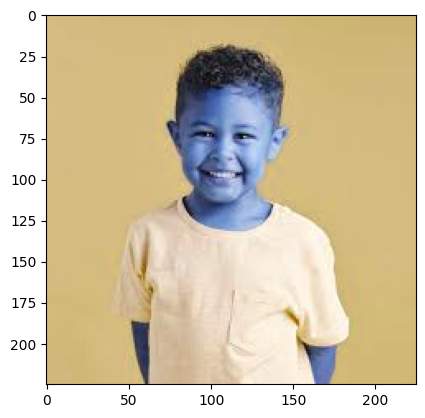

In [53]:
test_img = cv2.imread('/content/happytest.jpeg')
plt.imshow(test_img)

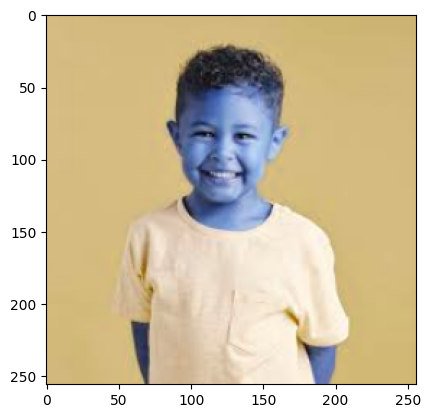

In [54]:
resize = tf.image.resize(test_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
resize.shape

TensorShape([256, 256, 3])

In [59]:
np.expand_dims(resize/255,0).shape

(1, 256, 256, 3)

In [57]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


In [60]:
print(yhat)

[[0.9590067]]


In [61]:
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


## Testing the model

In [63]:
from tensorflow.keras.models import load_model

In [65]:
if not os.path.exists('models'):
    os.makedirs('models')

model.save(os.path.join('models','happysadclassifier.h5'))

In [66]:
# Loading the model and predicting from it
new_model = load_model(os.path.join('models','happysadclassifier.h5'))

In [67]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


array([[0.9590067]], dtype=float32)

In [68]:
!git clone https://github.com/Himalayan13/CNN-Projects

Cloning into 'CNN-Projects'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [72]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [73]:
!cp "/content/drive/My Drive/Classifier.ipynb" /content/


cp: cannot stat '/content/drive/My Drive/Classifier.ipynb': No such file or directory


mv: cannot stat 'Classifier.ipynb': No such file or directory
